# Problem Overview
In the telecom industry, customers switch their operators when they come across better deals. Since it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention is more important than customer acquisition. In this project, we predict the churn for pre-paid customers who are predominant in the Indian and Southeast Asian market. 

# Business Objective
The business objective is to predict the churn in the ninth month using the data  from the first three months.

# Importing required libraries

In [1158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datatest as dt
warnings.filterwarnings('ignore')
from collections import Counter

# Data Import and Inspection

In [1159]:
data = pd.read_csv("telecom_churn_data.csv")

In [1160]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [1161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [1162]:
data.shape

(99999, 226)

**Inference**
* Could observe there are 99999 rows and 226 features
* We need to trim down the features list for an effective modeling

In [1163]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [1164]:
dataCols = data.columns.values
dataCols.shape

(226,)

In [1165]:
dataCols

array(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6', 'arpu_7',
       'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'onnet_mou_9', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'roam_og_mou_9', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_t2t_mou_8', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7',
       'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9', 'loc_og_mou_6',
       'loc_og_mou_7', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_6',
       'std_og_t2t

# Data Preparation

## Filter high-value customers

In [1166]:
# Finding Average Recharge Amount of first two months (6th & 7th Month)

In [1167]:
data['Total_Rechg_Months_6_7'] = data['total_rech_amt_6']+data['total_rech_amt_7']

In [1168]:
data['Total_Rechg_Months_6_7'].describe()

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
25%        230.000000
50%        458.000000
75%        838.000000
max      75525.000000
Name: Total_Rechg_Months_6_7, dtype: float64

In [1169]:
data['Total_Rechg_Months_6_7'].describe(percentiles=[0.7])

count    99999.000000
mean       650.477585
std        741.666932
min          0.000000
50%        458.000000
70%        737.000000
max      75525.000000
Name: Total_Rechg_Months_6_7, dtype: float64

In [1170]:
data_high_val_cust = data[data['Total_Rechg_Months_6_7'] > 737]

In [1171]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 227 entries, mobile_number to Total_Rechg_Months_6_7
dtypes: float64(179), int64(36), object(12)
memory usage: 52.1+ MB


In [1172]:
# Now that we have got the trimmed data frame consisting of data for high value customers, lets drop the newly introduced feature Total_Rechg_Months_6_7
# Otherise this variable will be wrongly considered for model evaluation

In [1173]:
data_high_val_cust.drop(columns=['Total_Rechg_Months_6_7'], inplace=True)

## Handling columns with higher percentage of Null Values

In [1174]:
data_nullvalues_calc = pd.DataFrame(data_high_val_cust.isnull().sum()/len(data_high_val_cust.index))

In [1175]:
data_nullvalues_calc

,0
mobile_number,0.000000
circle_id,0.000000
loc_og_t2o_mou,0.003803
std_og_t2o_mou,0.003803
loc_ic_t2o_mou,0.003803
...,...
aon,0.000000
aug_vbc_3g,0.000000
jul_vbc_3g,0.000000
jun_vbc_3g,0.000000


In [1176]:
data_nullvalues_calc.columns =['nullValPerc']

In [1177]:
data_nullvalues_calc.sort_values(by='nullValPerc',ascending=False)

,nullValPerc
arpu_3g_6,0.620167
total_rech_data_6,0.620167
night_pck_user_6,0.620167
count_rech_3g_6,0.620167
max_rech_data_6,0.620167
...,...
max_rech_amt_7,0.000000
max_rech_amt_6,0.000000
total_rech_amt_9,0.000000
total_rech_amt_8,0.000000


In [1178]:
data_nullvalues_calc = data_nullvalues_calc[data_nullvalues_calc.nullValPerc >= 0.50]

In [1179]:
columnsToDrop = data_nullvalues_calc.index

In [1180]:
columnsToDrop

Index(['date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_data_9',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [1181]:
data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(columnsToDrop)]

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.269,...,0,0,0,0,0,1022,0.00,0.00,0.00,0.0
99974,7001453306,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,414.303,...,0,0,0,0,0,3054,0.00,0.00,0.00,0.0
99986,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,644.973,...,0,0,0,0,0,2696,497.45,598.67,604.08,0.0
99988,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,312.558,...,0,0,0,0,0,328,104.73,0.00,0.00,0.0


In [1182]:
data_high_val_cust=data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(columnsToDrop)]

In [1183]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 186 entries, mobile_number to sep_vbc_3g
dtypes: float64(143), int64(35), object(8)
memory usage: 42.8+ MB


In [1184]:
#Lets take a look at what are all the remaining columns to decide next steps

In [1185]:
data_high_val_cust

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
17,7000187447,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,690.008,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.269,...,0,0,0,0,0,1022,0.00,0.00,0.00,0.0
99974,7001453306,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,414.303,...,0,0,0,0,0,3054,0.00,0.00,0.00,0.0
99986,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,644.973,...,0,0,0,0,0,2696,497.45,598.67,604.08,0.0
99988,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,312.558,...,0,0,0,0,0,328,104.73,0.00,0.00,0.0


**Inference**
* We could observe the below
* 1. There are features containing dates
* 2. Features containing numerical values
* 3. We also see mobile_number, circle_id
* Lets analyze for each of these buckets

## Identify Numerical and Categorical Features

In [1186]:
numCols = data_high_val_cust.select_dtypes("number").columns
catCols = data_high_val_cust.select_dtypes("object").columns
numCols= list(set(numCols))
catCols= list(set(catCols))

In [1187]:
len(numCols)

178

In [1188]:
len(catCols)

8

In [1189]:
numCols

['std_og_t2c_mou_6',
 'sachet_3g_9',
 'loc_ic_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_8',
 'onnet_mou_6',
 'roam_og_mou_9',
 'loc_ic_t2t_mou_6',
 'isd_ic_mou_6',
 'isd_ic_mou_8',
 'vol_3g_mb_7',
 'std_og_mou_8',
 'loc_og_t2c_mou_9',
 'total_rech_num_8',
 'roam_ic_mou_7',
 'std_og_t2m_mou_7',
 'std_og_mou_6',
 'std_og_t2m_mou_8',
 'og_others_8',
 'std_ic_t2t_mou_9',
 'loc_ic_t2t_mou_9',
 'aon',
 'monthly_3g_8',
 'loc_ic_t2m_mou_7',
 'std_ic_mou_6',
 'onnet_mou_7',
 'std_og_t2m_mou_9',
 'std_ic_mou_7',
 'loc_og_t2t_mou_9',
 'vol_2g_mb_9',
 'arpu_7',
 'total_rech_amt_8',
 'ic_others_9',
 'spl_ic_mou_9',
 'total_og_mou_9',
 'sep_vbc_3g',
 'loc_ic_mou_9',
 'vol_3g_mb_8',
 'monthly_2g_7',
 'std_og_t2t_mou_6',
 'sachet_2g_9',
 'loc_ic_t2m_mou_6',
 'circle_id',
 'total_rech_num_9',
 'vol_2g_mb_6',
 'std_ic_mou_9',
 'max_rech_amt_7',
 'offnet_mou_9',
 'total_ic_mou_8',
 'ic_others_7',
 'std_og_t2c_mou_9',
 'loc_og_t2f_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2f_mou_8',
 'std_ic_t2f_mou_9',
 'ma

In [1190]:
catCols

['date_of_last_rech_9',
 'date_of_last_rech_8',
 'last_date_of_month_7',
 'last_date_of_month_6',
 'date_of_last_rech_7',
 'date_of_last_rech_6',
 'last_date_of_month_9',
 'last_date_of_month_8']

## Features Identification with no significant value

### Analyze for Numerical Variables

In [1191]:
data_high_val_cust_numCols_uniqueVal = pd.DataFrame(data_high_val_cust.loc[:,numCols].nunique())

In [1192]:
data_high_val_cust_numCols_uniqueVal.columns = ['uniqueVal']

In [1193]:
featureNoSignificance = data_high_val_cust_numCols_uniqueVal[data_high_val_cust_numCols_uniqueVal.uniqueVal == 1].index

In [1194]:
featureNoSignificance

Index(['std_og_t2c_mou_6', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_8', 'circle_id',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_7',
       'loc_og_t2o_mou', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6',
       'std_og_t2o_mou', 'std_ic_t2o_mou_7'],
      dtype='object')

In [1195]:
data_high_val_cust = data_high_val_cust.loc[:, ~data_high_val_cust.columns.isin(featureNoSignificance)]

In [1196]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29979 entries, 7 to 99997
Columns: 174 entries, mobile_number to sep_vbc_3g
dtypes: float64(132), int64(34), object(8)
memory usage: 40.0+ MB


### Analyze for Categorical Variables

In [1197]:
data_high_val_cust.loc[:,catCols].nunique()

date_of_last_rech_9     30
date_of_last_rech_8     31
last_date_of_month_7     1
last_date_of_month_6     1
date_of_last_rech_7     31
date_of_last_rech_6     30
last_date_of_month_9     1
last_date_of_month_8     1
dtype: int64

In [1198]:
data_high_val_cust_catCols_uniqueVal = pd.DataFrame(data_high_val_cust.loc[:,catCols].nunique())

In [1199]:
data_high_val_cust_catCols_uniqueVal.columns = ['uniqueVal']

In [1200]:
data_high_val_cust_catCols_uniqueVal

,uniqueVal
date_of_last_rech_9,30
date_of_last_rech_8,31
last_date_of_month_7,1
last_date_of_month_6,1
date_of_last_rech_7,31
date_of_last_rech_6,30
last_date_of_month_9,1
last_date_of_month_8,1


In [1201]:
featureNoSignificance = data_high_val_cust_catCols_uniqueVal[data_high_val_cust_catCols_uniqueVal.uniqueVal == 1].index

In [1202]:
featureNoSignificance

Index(['last_date_of_month_7', 'last_date_of_month_6', 'last_date_of_month_9',
       'last_date_of_month_8'],
      dtype='object')

In [1203]:
data_high_val_cust = data_high_val_cust.loc[:, ~data_high_val_cust.columns.isin(featureNoSignificance)]

**Inference**
* We could see under Numerical Features, 
       std_og_t2c_mou_6', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_8', 'circle_id',
       'std_og_t2c_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2c_mou_7',
       'loc_og_t2o_mou', 'loc_ic_t2o_mou', 'std_ic_t2o_mou_6',
       'std_og_t2o_mou', 'std_ic_t2o_mou_7' have 1 unique value
* With categorical variable, we could see below features having only one unique value
      'last_date_of_month_7', 'last_date_of_month_6', 'last_date_of_month_9','last_date_of_month_8'

## Other Columns Null Value Treatment

In [1204]:
#numCols = data_high_val_cust.select_dtypes("number").columns
#catCols = data_high_val_cust.select_dtypes("object").columns
#numCols= list(set(numCols))
#catCols= list(set(catCols))

In [1205]:
#len(numCols)

In [1206]:
#len(catCols)

In [1207]:
#len(list(pd.DataFrame(round(data_high_val_cust.isnull().sum()/len(data_high_val_cust.index)*100,2),columns=['nullPercentage']).sort_values(by='nullPercentage',ascending=False).apply(lambda x: ((x['nullPercentage'] < 50) & (x['nullPercentage'] > 0)) , axis=1).index))

In [1208]:
nullPerCols = pd.DataFrame(round((data_high_val_cust.isnull().sum()/len(data_high_val_cust.index))* 100, 2), columns=['NullPercentage'])
nullPerLess50Percent = np.array(nullPerCols.apply(lambda x: ((x['NullPercentage'] < 50) & (x['NullPercentage'] > 0)) , axis=1))
len(np.array(data_high_val_cust.loc[:, nullPerLess50Percent].columns))

112

In [1209]:
#Check the quantum of null percentage column wise

In [1210]:
df_temp = data_high_val_cust.loc[:, nullPerLess50Percent]
round(df_temp.isnull().sum()/len(df_temp.index) * 100,2)

onnet_mou_6            1.05
onnet_mou_7            1.01
onnet_mou_8            3.13
onnet_mou_9            5.68
offnet_mou_6           1.05
                       ... 
ic_others_9            5.68
date_of_last_rech_6    0.21
date_of_last_rech_7    0.38
date_of_last_rech_8    1.98
date_of_last_rech_9    2.89
Length: 112, dtype: float64

In [1211]:
data_high_val_cust = data_high_val_cust.fillna(0)

In [1212]:
data_high_val_cust

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,0.00,453.43,...,0,0,0,0,0,802,57.74,19.38,18.74,0.0
8,7001524846,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,...,0,0,0,0,0,315,21.03,910.65,122.16,0.0
13,7002191713,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,...,0,0,0,0,0,2607,0.00,0.00,0.00,0.0
16,7000875565,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,...,0,0,0,0,0,511,0.00,2.45,21.89,0.0
17,7000187447,690.008,18.980,25.499,257.583,1185.91,9.28,7.79,558.51,61.64,...,0,0,0,0,0,667,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,330.963,5.01,142.59,97.61,206.19,329.58,...,0,0,0,0,0,1022,0.00,0.00,0.00,0.0
99974,7001453306,414.303,321.093,371.016,306.689,17.56,0.00,1.30,2.46,428.41,...,0,0,0,0,0,3054,0.00,0.00,0.00,0.0
99986,7001729035,644.973,455.228,564.334,267.451,806.73,549.36,775.41,692.63,784.76,...,0,0,0,0,0,2696,497.45,598.67,604.08,0.0
99988,7002111859,312.558,512.932,402.080,533.502,199.89,174.46,2.46,7.16,175.88,...,0,0,0,0,0,328,104.73,0.00,0.00,0.0


## Tag churners and remove attributes of the churn phase

In [1213]:
data_high_val_cust['churn'] = np.where(
            (
                (data_high_val_cust['total_ic_mou_9'] == 0.0) | 
                (data_high_val_cust['total_og_mou_9'] == 0.0)
            ) & 
            (
                (data_high_val_cust['vol_2g_mb_9'] == 0.0) & 
                (data_high_val_cust['vol_3g_mb_9'] == 0.0)
            ),1,0
        )

In [1214]:
# Remove columns with '9'
data_high_val_cust = data_high_val_cust.drop(data_high_val_cust.filter(like = '9').columns, axis=1)

In [1215]:
data_high_val_cust

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0,0,0,0,511,0.00,2.45,21.89,0.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,0,0,667,0.00,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,0
99974,7001453306,414.303,321.093,371.016,17.56,0.00,1.30,428.41,366.78,360.58,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,0
99986,7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,0
99988,7002111859,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,...,0,0,0,0,328,104.73,0.00,0.00,0.0,0


In [1216]:
data_high_val_cust

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0,0,0,0,511,0.00,2.45,21.89,0.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,0,0,667,0.00,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,0
99974,7001453306,414.303,321.093,371.016,17.56,0.00,1.30,428.41,366.78,360.58,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,0
99986,7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,0
99988,7002111859,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,...,0,0,0,0,328,104.73,0.00,0.00,0.0,0


In [1217]:
data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(data_high_val_cust.filter(like = '_9').columns)]

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,0,0,0,0,315,21.03,910.65,122.16,0.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,...,0,0,0,0,511,0.00,2.45,21.89,0.0,0
17,7000187447,690.008,18.980,25.499,1185.91,9.28,7.79,61.64,0.00,5.54,...,0,0,0,0,667,0.00,0.00,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,7001386760,261.269,410.614,290.851,5.01,142.59,97.61,329.58,500.14,355.48,...,0,0,0,0,1022,0.00,0.00,0.00,0.0,0
99974,7001453306,414.303,321.093,371.016,17.56,0.00,1.30,428.41,366.78,360.58,...,0,0,0,0,3054,0.00,0.00,0.00,0.0,0
99986,7001729035,644.973,455.228,564.334,806.73,549.36,775.41,784.76,617.13,595.44,...,0,0,0,0,2696,497.45,598.67,604.08,0.0,0
99988,7002111859,312.558,512.932,402.080,199.89,174.46,2.46,175.88,277.01,248.33,...,0,0,0,0,328,104.73,0.00,0.00,0.0,0


# Exploratory Data Analysis - EDA

In [1218]:
# Analysis to find Churn and Non-Churn Customers distribution

In [1219]:
data_high_val_cust.churn.value_counts(normalize=True)

0    0.903599
1    0.096401
Name: churn, dtype: float64

**Inference**
* we see a clear class imbalance with 90% of data classified as Not Churn and 10% having Churn as the label

In [1220]:
# Outlier Analysis

In [1221]:
numCols = data_high_val_cust.select_dtypes("number").columns

In [1222]:
#data_high_val_cust.loc[:, numCols]

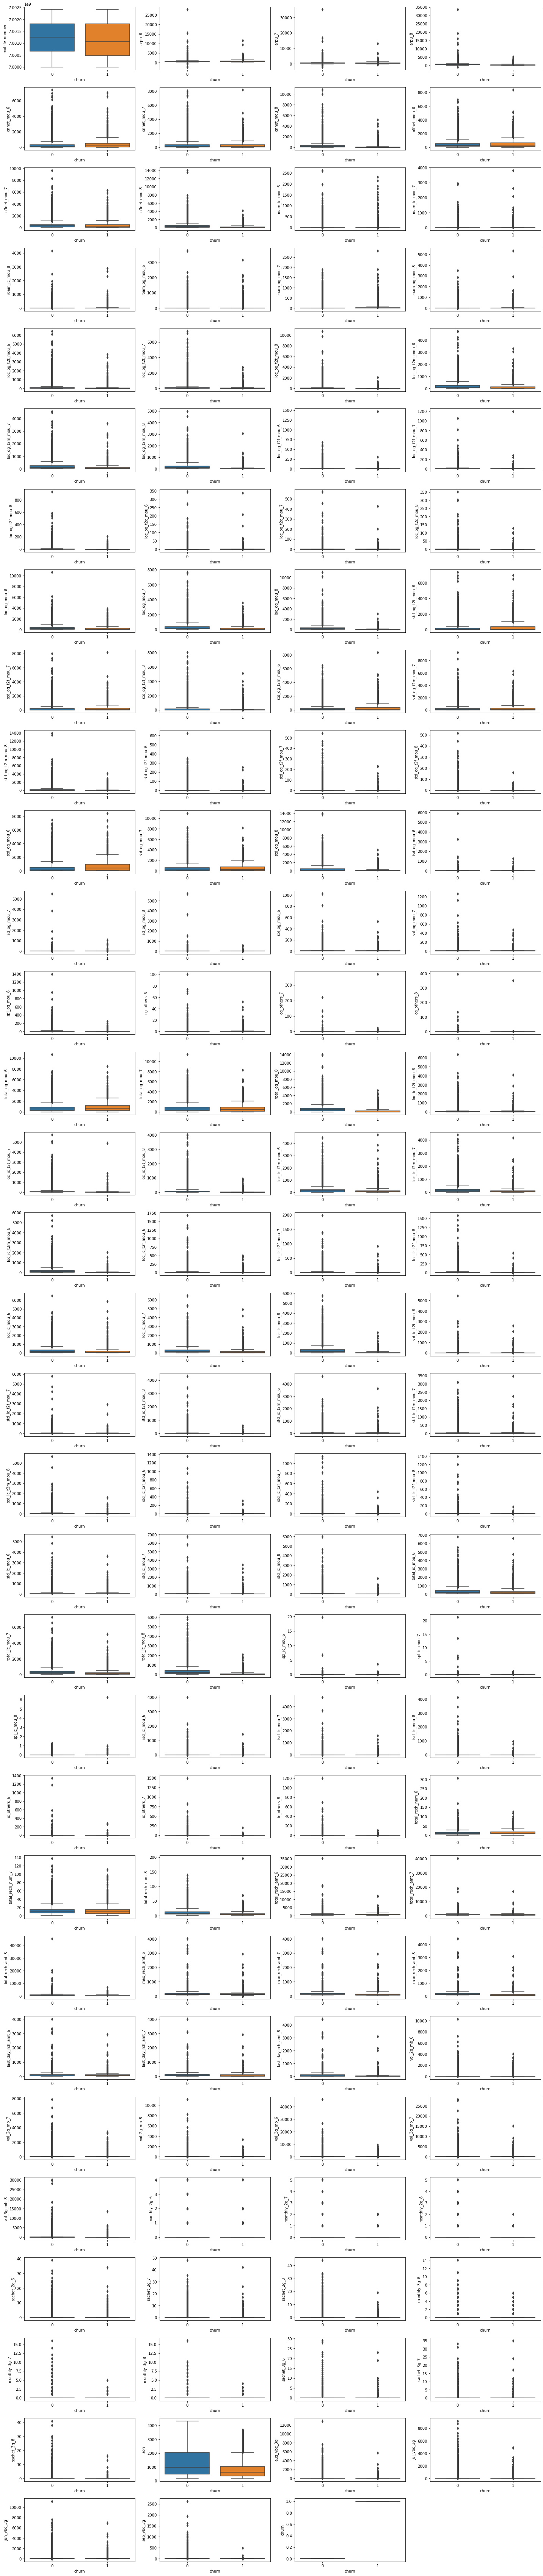

In [1223]:
fig = plt.figure(figsize=(20,100))
for i in range(len(numCols)):
    fig.add_subplot(34, 4, i+1)
    sns.boxplot(y=data_high_val_cust.loc[:, numCols].iloc[:,i],x=data_high_val_cust['churn'])
plt.tight_layout()
plt.show()

**Inference**
* Majorily seen under Non-Churn customers data
* As part of outlier treatment, lets drop those outlier data

In [1224]:
data_high_val_cust = data_high_val_cust.drop(data_high_val_cust.loc
    [(data_high_val_cust['churn'] == 0) & (
    (data_high_val_cust['arpu_6'] > 15000) | 
    (data_high_val_cust['arpu_7'] > 20000) | 
    (data_high_val_cust['arpu_8'] > 20000) | 
    (data_high_val_cust['onnet_mou_8'] > 8000) | 
    (data_high_val_cust['offnet_mou_7'] > 9000) |
    (data_high_val_cust['offnet_mou_8'] > 10000) |
    (data_high_val_cust['loc_og_t2t_mou_6'] > 6000) |
    (data_high_val_cust['loc_og_t2t_mou_7'] > 5000) |
    (data_high_val_cust['loc_og_t2t_mou_8'] > 6000) | 
    (data_high_val_cust['loc_og_t2m_mou_6'] > 4000) | 
    (data_high_val_cust['loc_og_t2f_mou_7'] > 600) |
    (data_high_val_cust['loc_og_t2f_mou_8'] > 600) |
    (data_high_val_cust['loc_og_t2c_mou_8'] > 250) |
    (data_high_val_cust['loc_og_mou_6'] > 8000) |
    (data_high_val_cust['loc_og_mou_7'] > 6000) | 
    (data_high_val_cust['loc_og_mou_8'] > 6000) |
    (data_high_val_cust['std_og_t2m_mou_8'] > 8000) | 
    (data_high_val_cust['std_og_t2f_mou_6'] > 400) |
    (data_high_val_cust['std_og_t2f_mou_7'] > 400) | 
    (data_high_val_cust['std_og_t2f_mou_8'] > 400) |
    (data_high_val_cust['std_og_mou_8'] > 10000) |
    (data_high_val_cust['spl_og_mou_7'] > 800) |
    (data_high_val_cust['spl_og_mou_8'] > 600) |
    (data_high_val_cust['total_og_mou_8'] > 8000) |
    (data_high_val_cust['loc_ic_t2m_mou_8'] > 3000) |
    (data_high_val_cust['loc_ic_t2f_mou_6'] > 1000) |
    (data_high_val_cust['loc_ic_t2f_mou_8'] > 1000) |
    (data_high_val_cust['loc_ic_mou_8'] > 4000) |
    (data_high_val_cust['std_ic_t2m_mou_8'] > 3000) | 
    (data_high_val_cust['std_ic_t2f_mou_8'] > 800) | 
    (data_high_val_cust['std_ic_mou_8'] > 3000) |
    (data_high_val_cust['total_ic_mou_8'] > 4000) |
    (data_high_val_cust['isd_ic_mou_7'] > 3000) |
    (data_high_val_cust['isd_ic_mou_8'] > 2000) |
    (data_high_val_cust['ic_others_8'] > 400) | 
    (data_high_val_cust['sachet_2g_8'] > 30) | 
    (data_high_val_cust['sachet_3g_8'] > 30)
)].index)

In [1225]:
#After Outlier Treatment

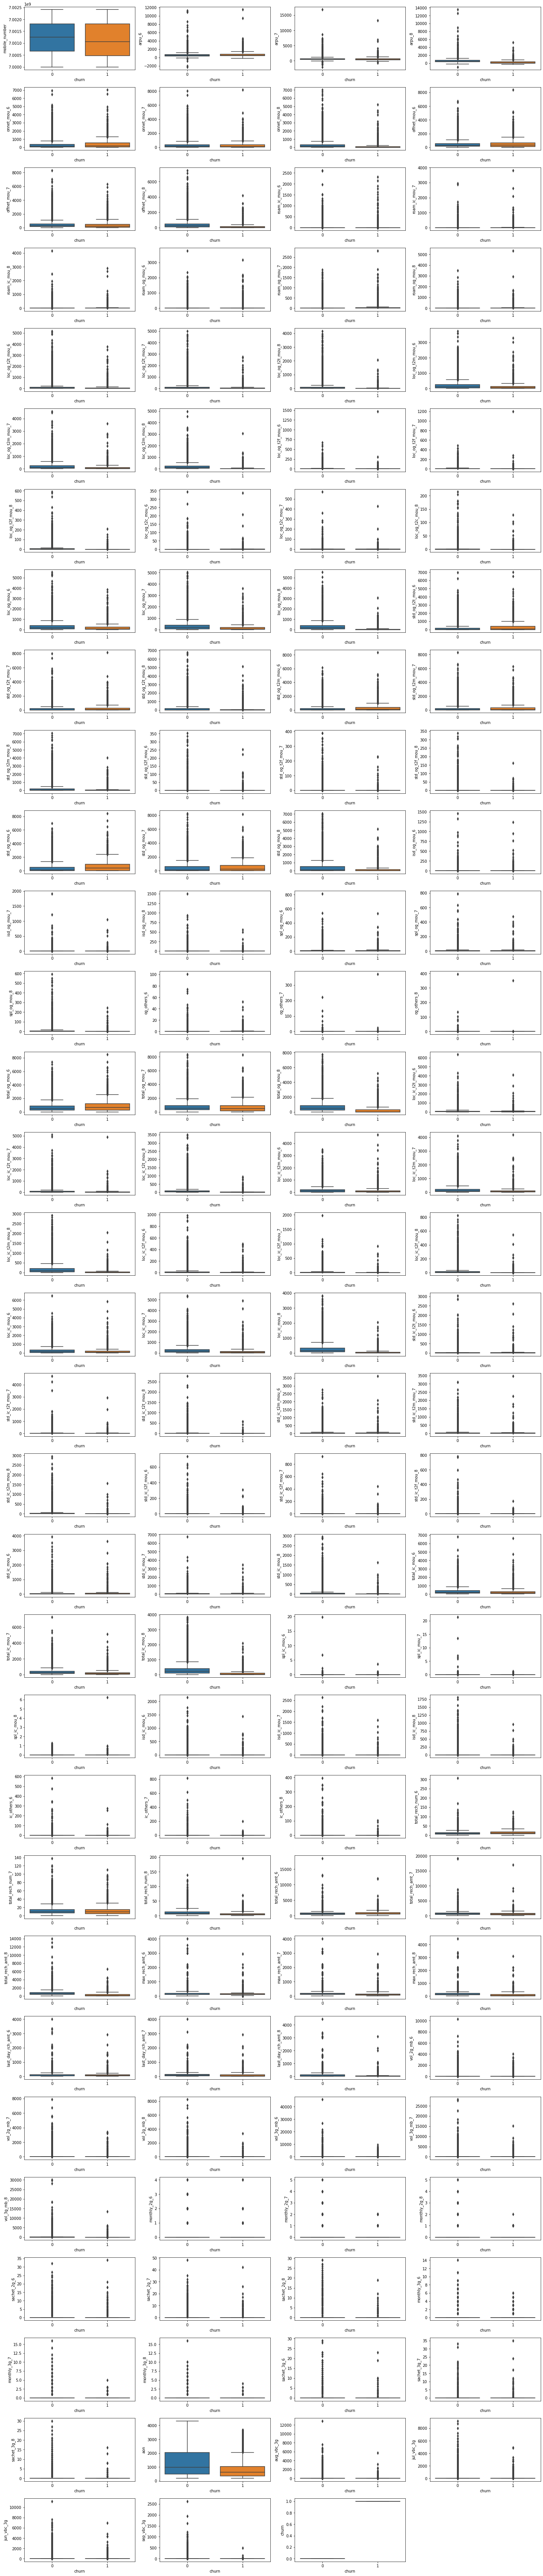

In [1226]:
fig = plt.figure(figsize=(20,100))
for i in range(len(numCols)):
    fig.add_subplot(34, 4, i+1)
    sns.boxplot(y=data_high_val_cust.loc[:, numCols].iloc[:,i],x=data_high_val_cust['churn'])
plt.tight_layout()
plt.show()

In [1227]:
# Lets Analyze the pattern of Churn Vs Non-Churn customers 

In [1228]:
# Derive Features to see percentage of calls [loc / std / spl / og on both Outgoing and Incoming] against each of the total

In [1229]:
# Derive Features to see percentage of calls for Month-6

In [1230]:
data_high_val_cust['loc_og_mou_6_perc'] = round((data_high_val_cust['loc_og_mou_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['std_og_mou_6_perc'] = round((data_high_val_cust['std_og_mou_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['spl_og_mou_6_perc'] = round((data_high_val_cust['spl_og_mou_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['og_others_6_perc'] = round((data_high_val_cust['og_others_6']/data_high_val_cust['total_og_mou_6']) * 100,2)
data_high_val_cust['loc_ic_mou_6_perc'] = round((data_high_val_cust['loc_ic_mou_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)
data_high_val_cust['std_ic_mou_6_perc'] = round((data_high_val_cust['std_ic_mou_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)
data_high_val_cust['spl_ic_mou_6_perc'] = round((data_high_val_cust['spl_ic_mou_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)
data_high_val_cust['ic_others_6_perc'] = round((data_high_val_cust['ic_others_6']/data_high_val_cust['total_ic_mou_6']) * 100,2)

In [1231]:
# Derive Features to see percentage of calls for Month-7

In [1232]:
data_high_val_cust['loc_og_mou_7_perc'] = round((data_high_val_cust['loc_og_mou_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['std_og_mou_7_perc'] = round((data_high_val_cust['std_og_mou_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['spl_og_mou_7_perc'] = round((data_high_val_cust['spl_og_mou_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['og_others_7_perc'] = round((data_high_val_cust['og_others_7']/data_high_val_cust['total_og_mou_7']) * 100,2)
data_high_val_cust['loc_ic_mou_7_perc'] = round((data_high_val_cust['loc_ic_mou_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)
data_high_val_cust['std_ic_mou_7_perc'] = round((data_high_val_cust['std_ic_mou_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)
data_high_val_cust['spl_ic_mou_7_perc'] = round((data_high_val_cust['spl_ic_mou_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)
data_high_val_cust['ic_others_7_perc'] = round((data_high_val_cust['ic_others_7']/data_high_val_cust['total_ic_mou_7']) * 100,2)

In [1233]:
# Derive Features to see percentage of calls for Month-8

In [1234]:
data_high_val_cust['loc_og_mou_8_perc'] = round((data_high_val_cust['loc_og_mou_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['std_og_mou_8_perc'] = round((data_high_val_cust['std_og_mou_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['spl_og_mou_8_perc'] = round((data_high_val_cust['spl_og_mou_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['og_others_8_perc'] = round((data_high_val_cust['og_others_8']/data_high_val_cust['total_og_mou_8']) * 100,2)
data_high_val_cust['loc_ic_mou_8_perc'] = round((data_high_val_cust['loc_ic_mou_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)
data_high_val_cust['std_ic_mou_8_perc'] = round((data_high_val_cust['std_ic_mou_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)
data_high_val_cust['spl_ic_mou_8_perc'] = round((data_high_val_cust['spl_ic_mou_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)
data_high_val_cust['ic_others_8_perc'] = round((data_high_val_cust['ic_others_8']/data_high_val_cust['total_ic_mou_8']) * 100,2)

In [1235]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29889 entries, 7 to 99997
Columns: 154 entries, mobile_number to ic_others_8_perc
dtypes: float64(124), int32(1), int64(26), object(3)
memory usage: 36.5+ MB


In [1236]:
# Fill All Nan Value because of 0 division set to 0.
data_high_val_cust = data_high_val_cust.fillna(0).reset_index()

In [1237]:
catCols = data_high_val_cust.select_dtypes("object").columns

In [1238]:
data_high_val_cust = data_high_val_cust.loc[:,~data_high_val_cust.columns.isin(catCols)]

In [1239]:
data_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Columns: 152 entries, index to ic_others_8_perc
dtypes: float64(124), int32(1), int64(27)
memory usage: 34.5 MB


In [1240]:
# lets write a function to plot historgram for some sample columns
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [1241]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [1242]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

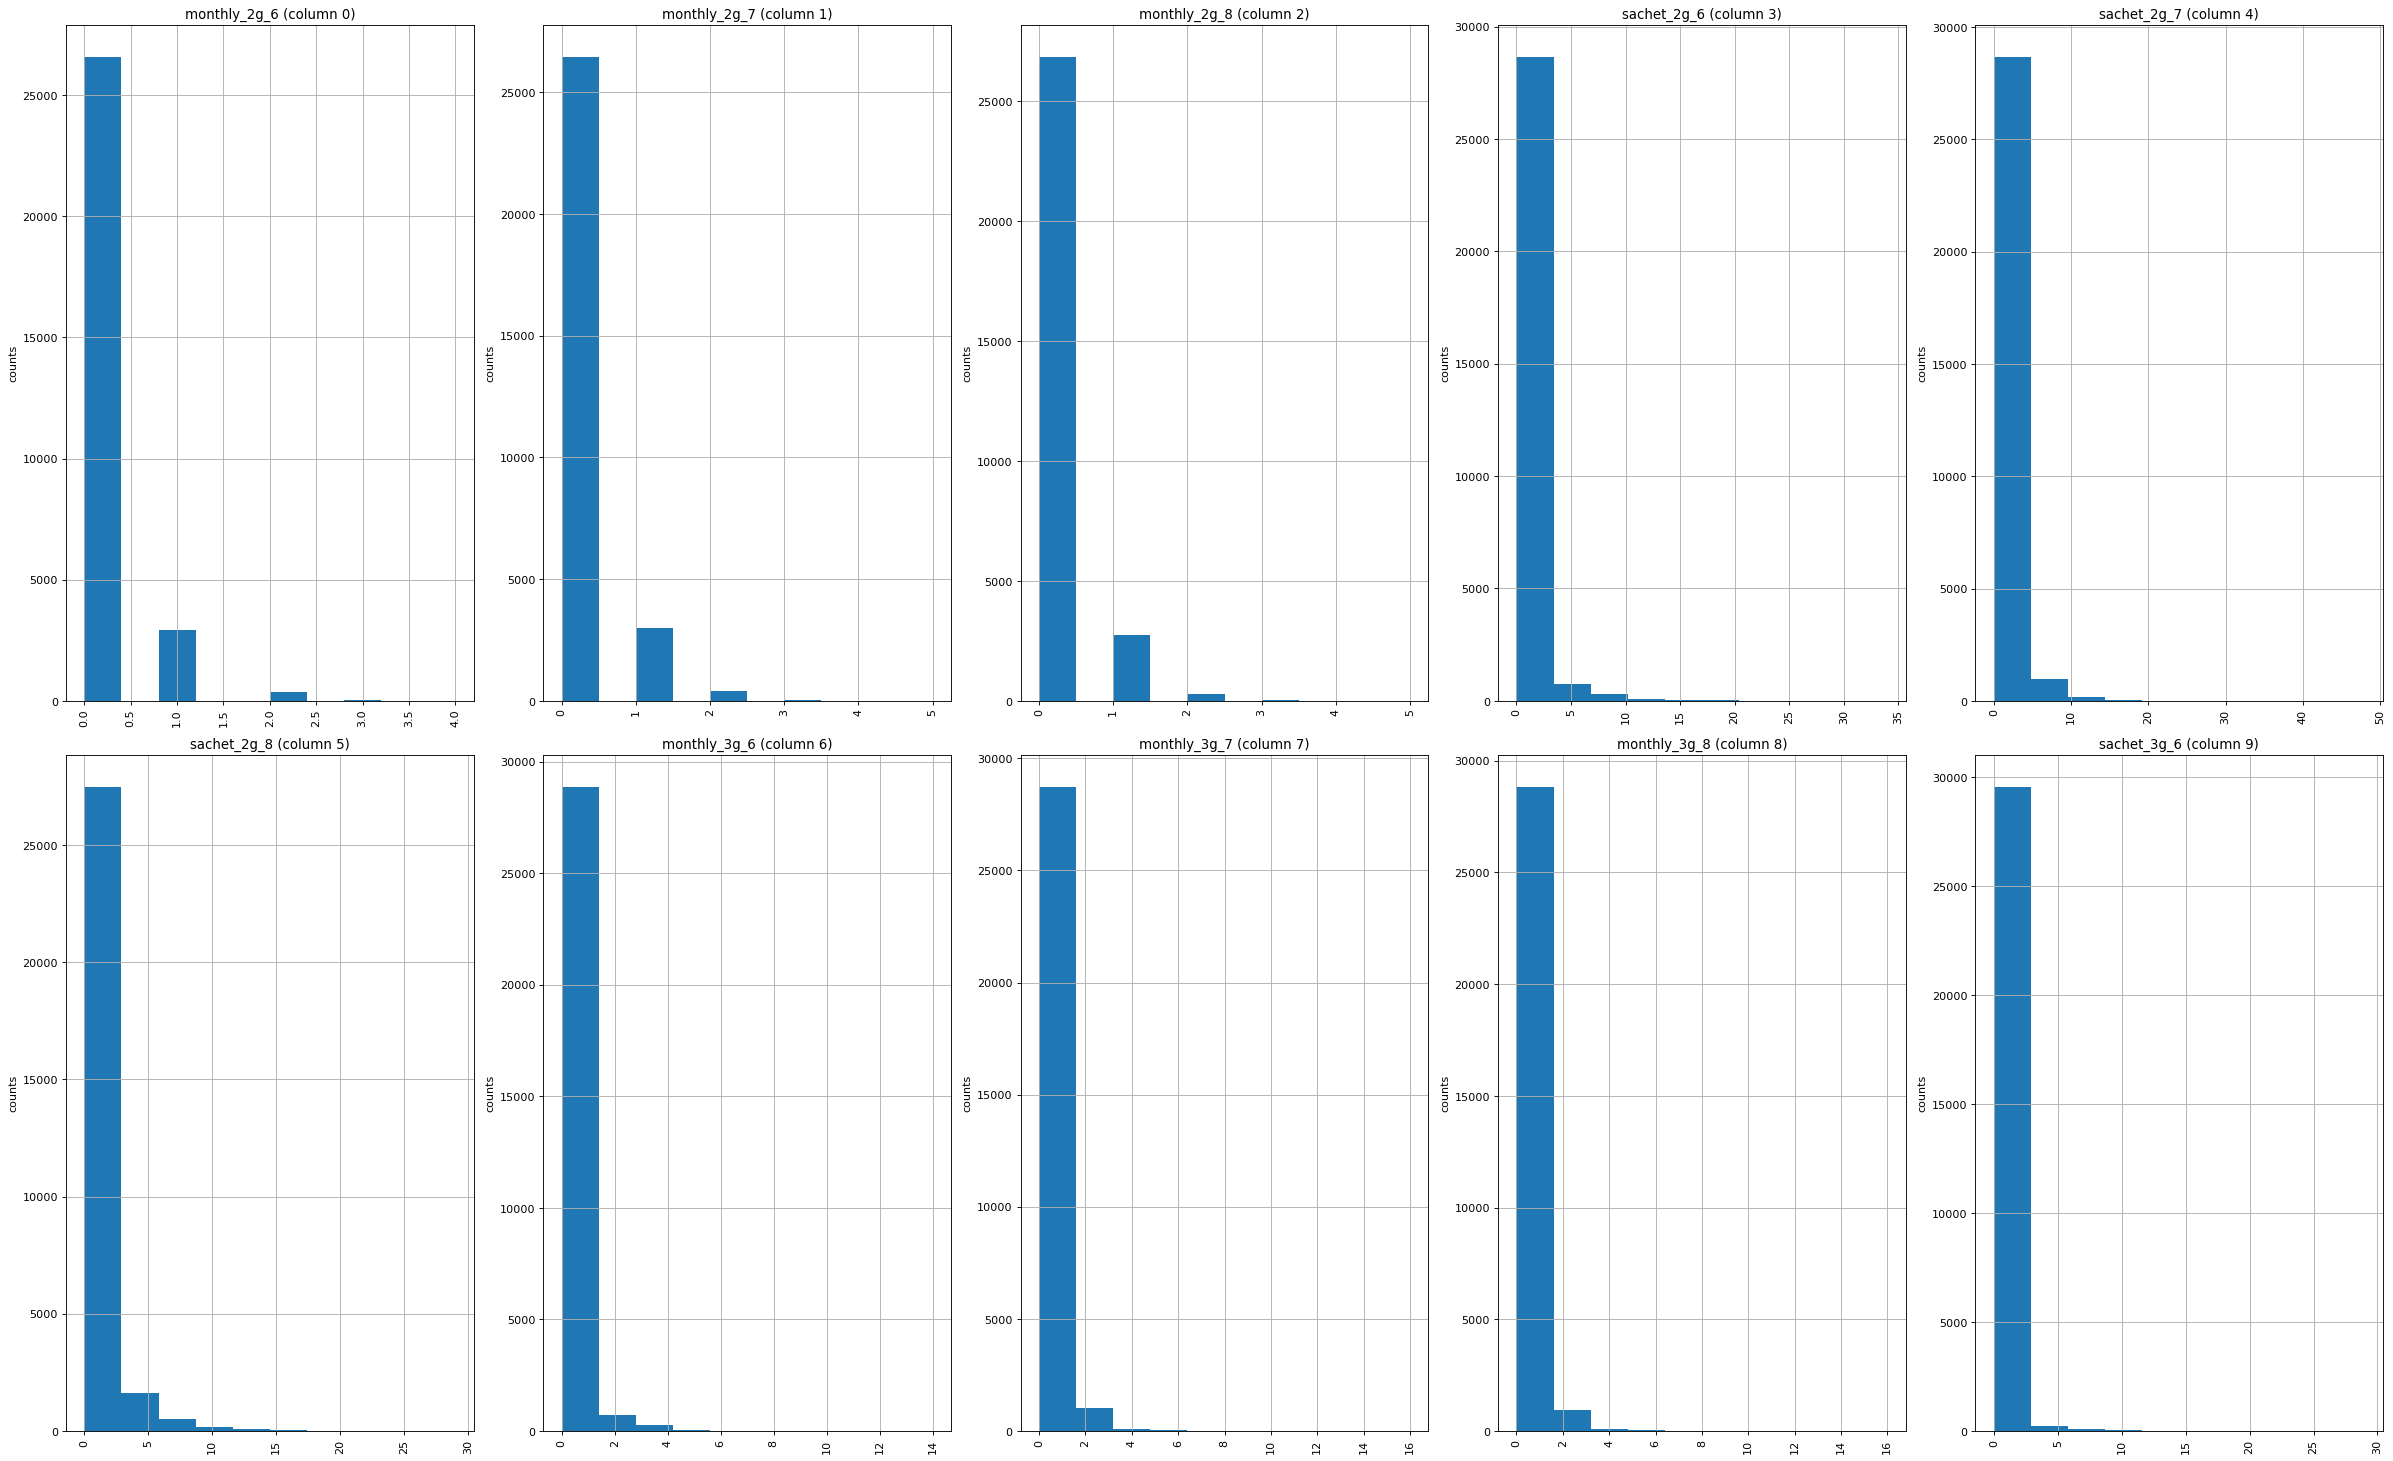

In [1243]:
#Plottng the Distribution plot 
plotPerColumnDistribution(data_high_val_cust, 10, 5)

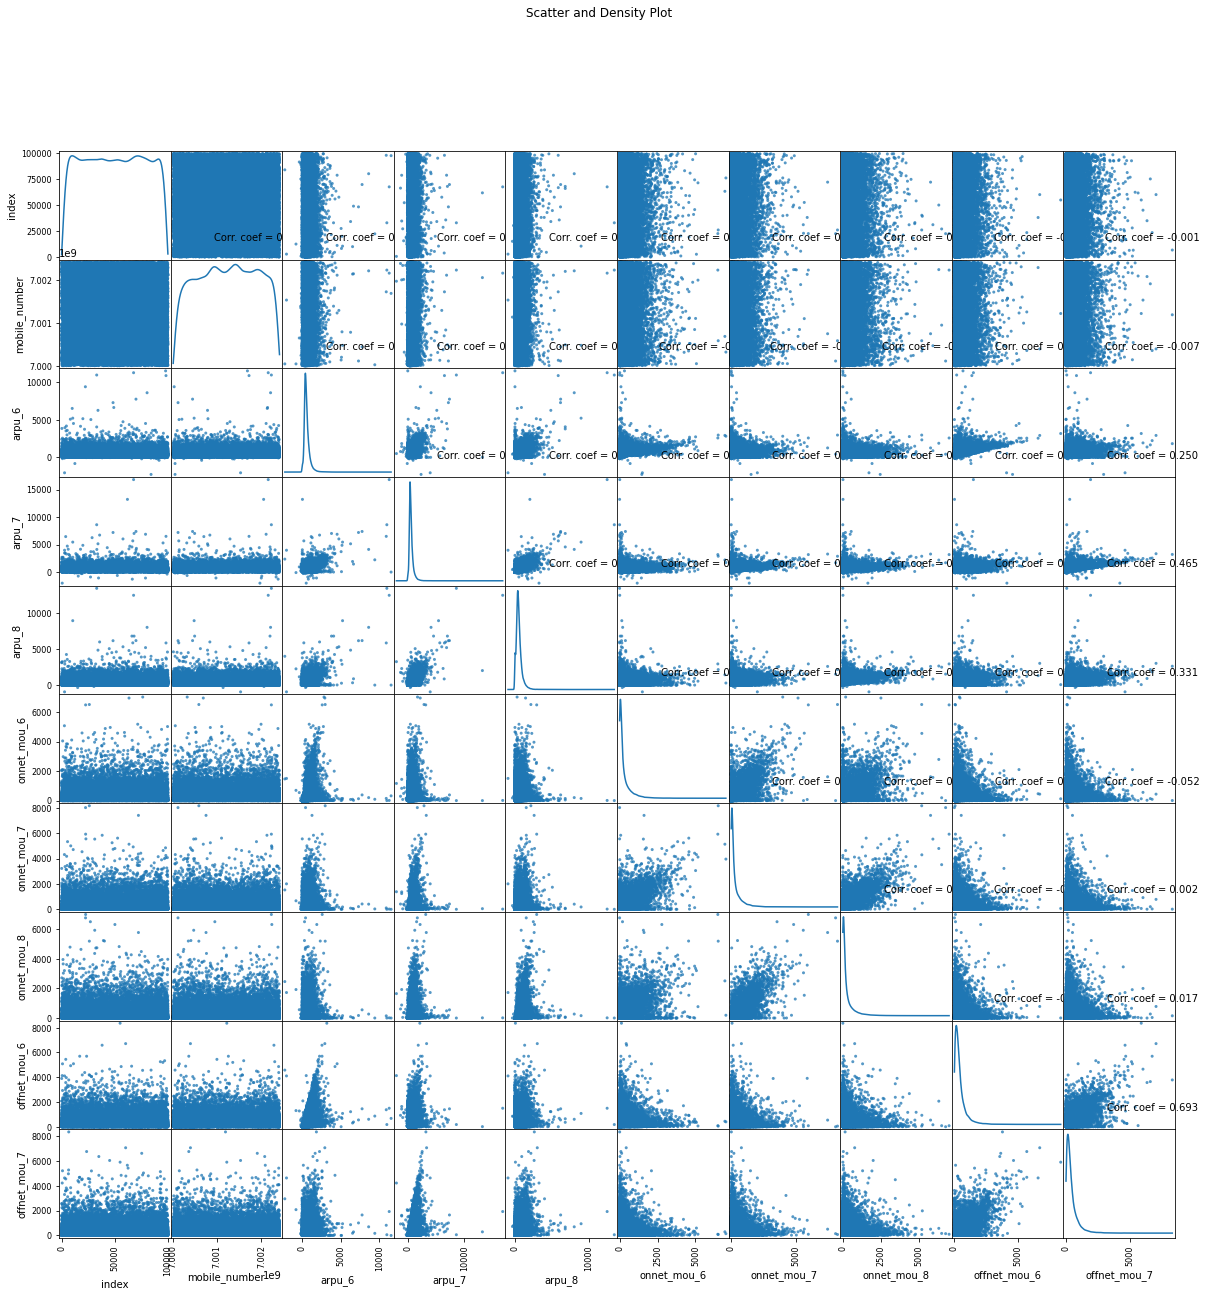

In [1244]:
#plotting scatter plot to understand correlation co-efficients
plotScatterMatrix(data_high_val_cust, 20, 10)

Text(0.5, 1.0, 'Churn Vs Base Cost')

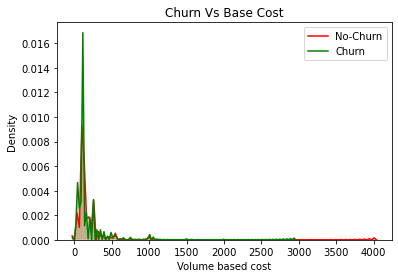

In [1245]:
# churn Vs Base Cost month 6
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_6[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_6[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

Text(0.5, 1.0, 'Churn Vs Base Cost')

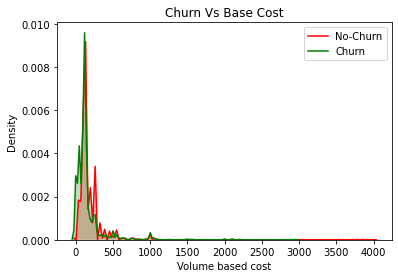

In [1246]:
# churn Vs Base Cost month 7
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_7[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_7[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Green", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Churn Vs Base Cost')

**Inference**
* By looking at the graphs of month 6 and 7 churn rate is almost similar and it represents there is no significant churn rate  as this is a good phase

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

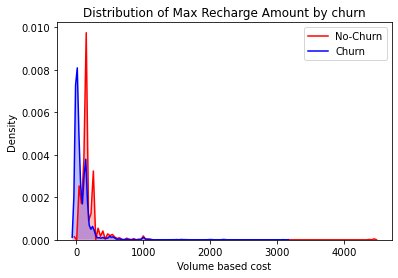

In [1247]:
# churn vs max rechare amount
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_8[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_8[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

# Prediction Modeling using Logistic Regression

In [1248]:
# This is to see the baseline statistics 

In [1249]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [1250]:
X = (data_high_val_cust.iloc[:,2:])
X = X.loc[:,X.columns != 'churn']
y = data_high_val_cust.loc[:, 'churn']

#Standardization of Data
scaler = StandardScaler()
scaler.fit(X)
#Using a Train : Test Split of 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [1251]:
## Logistic Regression

In [1252]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [1253]:
print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.927400468384075
F1 score:  0.5702970297029702
Recall:  0.4752475247524752
Precision:  0.7128712871287128

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      5372
           1       0.71      0.48      0.57       606

    accuracy                           0.93      5978
   macro avg       0.83      0.73      0.77      5978
weighted avg       0.92      0.93      0.92      5978


 confussion matrix:
 [[5256  116]
 [ 318  288]]


In [1254]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

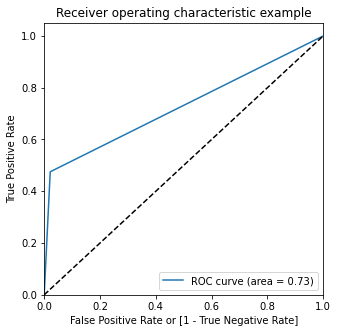

In [1255]:
draw_roc(y_test, y_pred)

**Inference**
* We Accuracy of basic logistic regression model to be 92.7%
* Other metrics does not seem to be better with Recall at 47.5% and Precision at 71.2%
* ROC Curve is 0.73
* Lets handle Class Imbalance and perform logictic regression with advance model like Random Forest

# Handling Imbalanced Dataset

Text(0.5, 1.0, 'Class Distributions \n (0: No Claim || 1: Claim)')

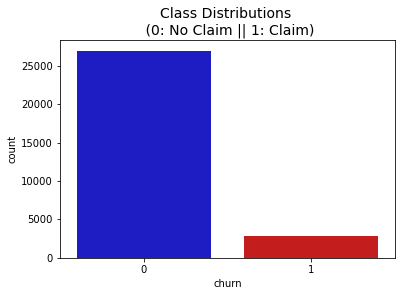

In [1256]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('churn', data=data_high_val_cust, palette=colors)
plt.title('Class Distributions \n (0: No Claim || 1: Claim)', fontsize=14)

In [1257]:
# Lets use SMOTE

### SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations

In [1258]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

43254

In [1259]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 21627), (1, 21627)]


# Prediction post Imbalance Treatment

## Random Forest - SMOTE

In [ ]:
 from sklearn.ensemble import RandomForestClassifier
rf_smt = RandomForestClassifier()
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [ ]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

In [ ]:
draw_roc(y_test, y_pred_rf_smt)

**Inference**
* Significant increase in ROC Curve with 0.82
* There has been good jump in percentage for Recall and Precision

## Decision Trees - SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [ ]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

In [ ]:
draw_roc(y_test, y_pred_dtc_smt)

**Inference**
* Compared to Random Forest with SMOTE, Decision Tree with SMOTE is inefficient as it ROC curve value degraded

# Feature Importance Analysis

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
feature_importance = pd.DataFrame(data={
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_   
})

In [ ]:
feature_importance = feature_importance.loc[feature_importance['Importance'] != 0]

In [ ]:
feature_importance.sort_values(by='Importance',ascending=False).head(15)

In [ ]:
#Draw the plot for the features with non-zero co-efficient
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
plt.subplot(111)
ax1 = sns.barplot(x = feature_importance['Feature'], y = feature_importance['Importance'])
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=10)
plt.ylabel('Co-efficient')
plt.show()

**Inference**
 We see below are the driver features
loc_ic_mou_8			
arpu_8					
loc_ic_t2m_mou_8		
total_ic_mou_8			
loc_og_mou_8_perc		
loc_og_t2m_mou_8		
total_rech_amt_8		
loc_ic_t2t_mou_8		
loc_og_mou_8			
max_rech_amt_8			
loc_ic_mou_8_perc		
last_day_rch_amt_8		
total_og_mou_8			
loc_og_t2t_mou_8		
offnet_mou_8			

# Conclusion

* In terms of modeling effectiveness, observe Random Forest post SMOTE class imbalance treatment, there is a better ROC curve of 0.81 with accuracy as 92%.

* Features that majorly influences the Churn are as below - Mainly its covering the Customer behaviour on Recharge, Outgoing Calls
arpu_8
loc_ic_t2m_mou_8
total_ic_mou_8
loc_og_mou_8_perc
loc_og_t2m_mou_8
total_rech_amt_8
loc_ic_t2t_mou_8
loc_og_mou_8
max_rech_amt_8
loc_ic_mou_8_perc
last_day_rch_amt_8
total_og_mou_8
loc_og_t2t_mou_8
offnet_mou_8.

### Recommendations
* There is a need to observe Month on Month on ARPU, Recharge and Call Activities to watch for the decline trend which need to be reversed by :
1. Giving Recharge Discounts.
2.  Value added packs for recharges.
3. Hidden concerns on the network quality to see if the network performance hindering the call activities.